In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("../../Model/cleaned_dataset.csv")
backup_data = pd.read_csv("../../Model/cleaned_dataset.csv")

In [2]:
data.drop(columns=['Posting Month'])
X = data.drop(columns=['Price','Posting Month'])  
y = data['Price']

In [3]:
X.shape, y.shape

((5128, 11), (5128,))

In [4]:
categorical_columns = ['Manufacturer', 'Model', 'Transmission', 'Fuel', 'country_of_origin']
numerical_columns = ['Horse Power', 'Mileage', 'Posting Year', 'Age', 'price_per_km', 'price_per_horsepower']

In [5]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False), categorical_columns),  # Encode categorical features
    ],
    remainder='passthrough'  # Pass numerical features as-is
)

In [6]:
X_encoded = ct.fit_transform(X)

In [7]:
encoded_feature_names = (
    ct.named_transformers_['cat'].get_feature_names_out(categorical_columns).tolist()
    + numerical_columns
)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4102, 805), (1026, 805), (4102,), (1026,))

----------------------------------MODEL--------------------------------------------

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

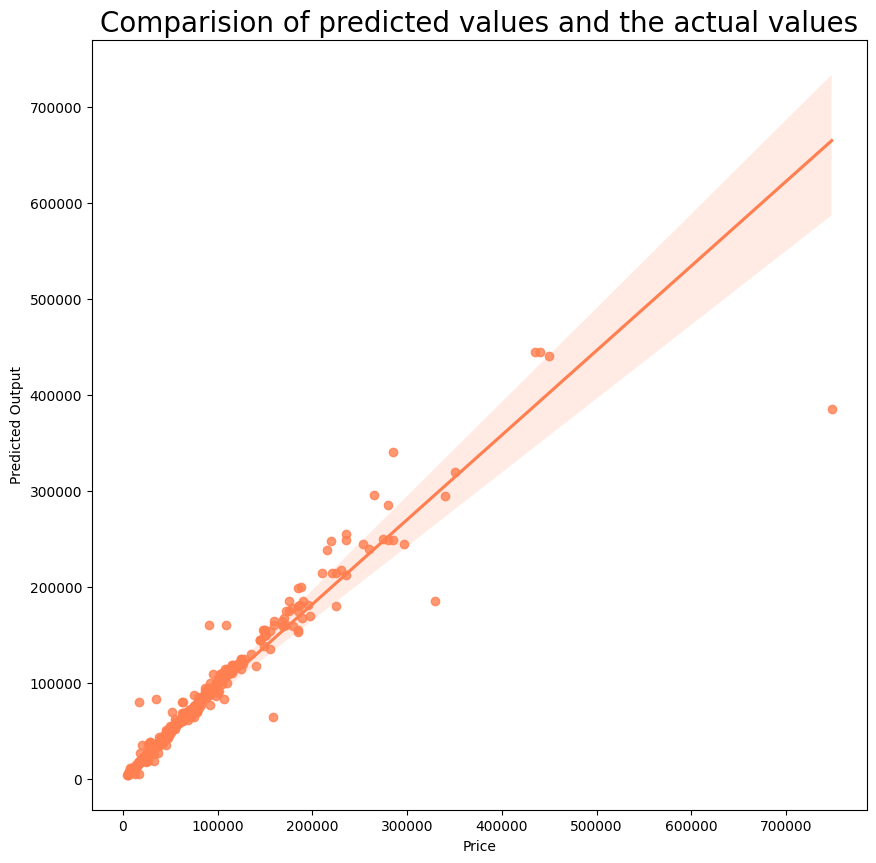

In [15]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'Price', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


mae_new = mean_absolute_error(y_test, y_predict)
mse_new = mean_squared_error(y_test, y_predict)
r2_new = r2_score(y_test, y_predict)

print(f"MAE après suppression: {mae_new}")
print(f"MSE après suppression: {mse_new}")
print(f"R² après suppression: {r2_new}")

MAE après suppression: 2458.5701754385964
MSE après suppression: 199538399.3011696
R² après suppression: 0.9335661695426869


(805,)